# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Guzga Adrian-Dumitru - __[adrian-dumitru.guzga@ulb.be](mailto:adrian-dumitru.guzga@ulb.be) - Student ID 460513__
### Martis William - __[william.martis@ulb.be](william.martis@ulb.be) - Student ID 441157__
### Schmidt Xavier - __[xavier.schmidt@ulb.be](xavier.schmidt@ulb.be) - Student ID 445723__

### Video presentation: www.youtube.com/doge_shiba_cummies_to_the_moon

## Project Title


# Introduction


# Data preprocessing

In [62]:
library(rlang)
library(dummies)
library(stringdist)
library(dplyr)
library(randomForest)

In [63]:
df <- read.csv("training_data.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")
#df <- df[, setdiff(names(df), "X")]
#df_labels <- read.csv("training_labels.csv", header = TRUE, strip.white = TRUE, sep = ",")

In [64]:
lowercase_all = function(df) {
    for(column in names(df)) {
        columnClass = class(df[,column])
        if(columnClass == "factor") {
            df[,column] <<- tolower(df[,column])
        }
    }
}

In [65]:
lowercase_all(df)

## Cleaning data

### First statistics about the dataframe:

In [66]:
str(df)

'data.frame':	59400 obs. of  40 variables:
 $ id                   : int  69572 8776 34310 67743 19728 9944 19816 54551 53934 46144 ...
 $ amount_tsh           : num  6000 0 25 0 0 20 0 0 0 0 ...
 $ date_recorded        : chr  "14/03/2011" "06/03/2013" "25/02/2013" "28/01/2013" ...
 $ funder               : chr  "roman" "grumeti" "lottery club" "unicef" ...
 $ gps_height           : int  1390 1399 686 263 0 0 0 0 0 0 ...
 $ installer            : chr  "roman" "grumeti" "world vision" "unicef" ...
 $ longitude            : num  34.9 34.7 37.5 38.5 31.1 ...
 $ latitude             : num  -9.86 -2.15 -3.82 -11.16 -1.83 ...
 $ wpt_name             : chr  "none" "zahanati" "kwa mahundi" "zahanati ya nanyumbu" ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin                : chr  "lake nyasa" "lake victoria" "pangani" "ruvuma / southern coast" ...
 $ subvillage           : chr  "mnyusi b" "nyamara" "majengo" "mahakamani" ...
 $ region               : chr  "iringa" "mara" "

The above table gives us information on the different types of variables presents in our dataframe. There are 4 types of variables namely, integer, numeric, character and logical.

In order to better analyze our date, we decided to split the variables into two distinct groups; the numerical ones including integers and numeric values, and on the other side the categorical variables. 

By isolating the numerical variables, R is now able to provide us with a range of descriptive statistics on the features.


#### Numerical features

In [116]:
categorical_features<-which(sapply(df[1,],class)=="character"|sapply(df[1,],class)=="logical")
df_numeric<-df[,-categorical_features]

summary(df_numeric)


       id          amount_tsh         gps_height       longitude    
 Min.   :    0   Min.   :     0.0   Min.   : -90.0   Min.   : 0.00  
 1st Qu.:18520   1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.09  
 Median :37062   Median :     0.0   Median : 369.0   Median :34.91  
 Mean   :37115   Mean   :   317.7   Mean   : 668.3   Mean   :34.08  
 3rd Qu.:55656   3rd Qu.:    20.0   3rd Qu.:1319.2   3rd Qu.:37.18  
 Max.   :74247   Max.   :350000.0   Max.   :2770.0   Max.   :40.35  
    latitude        num_private         region_code   district_code  
 Min.   :-11.649   Min.   :   0.0000   Min.   : 1.0   Min.   : 0.00  
 1st Qu.: -8.541   1st Qu.:   0.0000   1st Qu.: 5.0   1st Qu.: 2.00  
 Median : -5.022   Median :   0.0000   Median :12.0   Median : 3.00  
 Mean   : -5.706   Mean   :   0.4741   Mean   :15.3   Mean   : 5.63  
 3rd Qu.: -3.326   3rd Qu.:   0.0000   3rd Qu.:17.0   3rd Qu.: 5.00  
 Max.   :  0.000   Max.   :1776.0000   Max.   :99.0   Max.   :80.00  
   population      construc

In [72]:
# Amount_tsh contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 41,639 of them have a null value, which represents approximatively 70% of the observations.

summary(df$amount_tsh)

test = as.data.frame(table(df$amount_tsh))
test[order(-test$Freq),]
dim(test)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.0    317.7     20.0 350000.0 

,Var1,Freq
1,0,41639
35,500,3102
20,50,2472
44,1000,1488
13,20,1463
27,200,1220
25,100,816
10,10,806
16,30,743
49,2000,704


[1] 98  2

In [74]:
# GPS_Height contains a significant quantity of invalid data values represented by 0 and negative numbers.
# Out of 59,400 records, 20438 of them have a null value, which represents approximatively 35% of the observations.


summary(df$gps_height)

test = as.data.frame(table(df$gps_height))
test[order(-test$Freq),]
dim(test)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -90.0     0.0   369.0   668.3  1319.2  2770.0 

,Var1,Freq
60,0,20438
45,-15,60
44,-16,55
47,-13,55
40,-20,52
1349,1290,52
46,-14,51
363,303,51
42,-18,49
41,-19,47


[1] 2428    2

In [76]:
# Num_private contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 58,643 of them have a null value, which represents approximatively 99% of the observations.


summary(df$num_private)

test = as.data.frame(table(df$num_private))
test[order(-test$Freq),]
dim(test)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0000    0.0000    0.0000    0.4741    0.0000 1776.0000 

,Var1,Freq
1,0,58643
7,6,81
2,1,73
6,5,46
9,8,46
26,32,40
33,45,36
15,15,35
30,39,30
44,93,28


[1] 65  2

In [169]:
# Region_code has a total of 27 different inputs with no 0/NA value. 
test = as.data.frame(table(df$region_code))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
11,11,5300
17,17,5011
12,12,4639
3,3,4379
5,5,4040
18,18,3324
19,19,3047
2,2,3024
16,16,2816
10,10,2640


[1] 27  2

In [171]:
# District has a total of 20 different inputs.
test = as.data.frame(table(df$district_code))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
2,1,12203
3,2,11173
4,3,9998
5,4,8999
6,5,4356
7,6,4074
8,7,3343
9,8,1043
12,30,995
13,33,874


[1] 20  2

In [142]:
test = as.data.frame(table(df$region))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
4,iringa,5294
18,shinyanga,4982
11,mbeya,4639
7,kilimanjaro,4379
12,morogoro,4006
1,arusha,3350
5,kagera,3316
14,mwanza,3102
6,kigoma,2816
17,ruvuma,2640


[1] 21  2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0    25.0   179.9   215.0 30500.0 

,Var1,Freq
1,0,21381
2,1,7025
198,200,1940
150,150,1892
248,250,1681
297,300,1476
101,100,1146
51,50,1139
467,500,1009
344,350,986


[1] 1049    2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    40.0   150.0   281.1   324.0 30500.0 

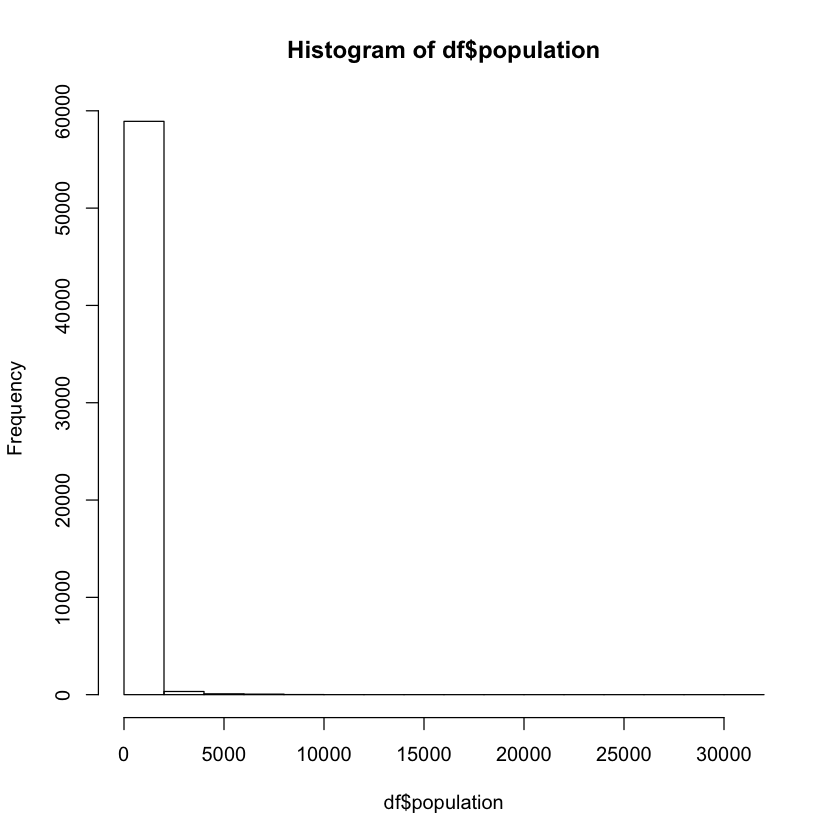

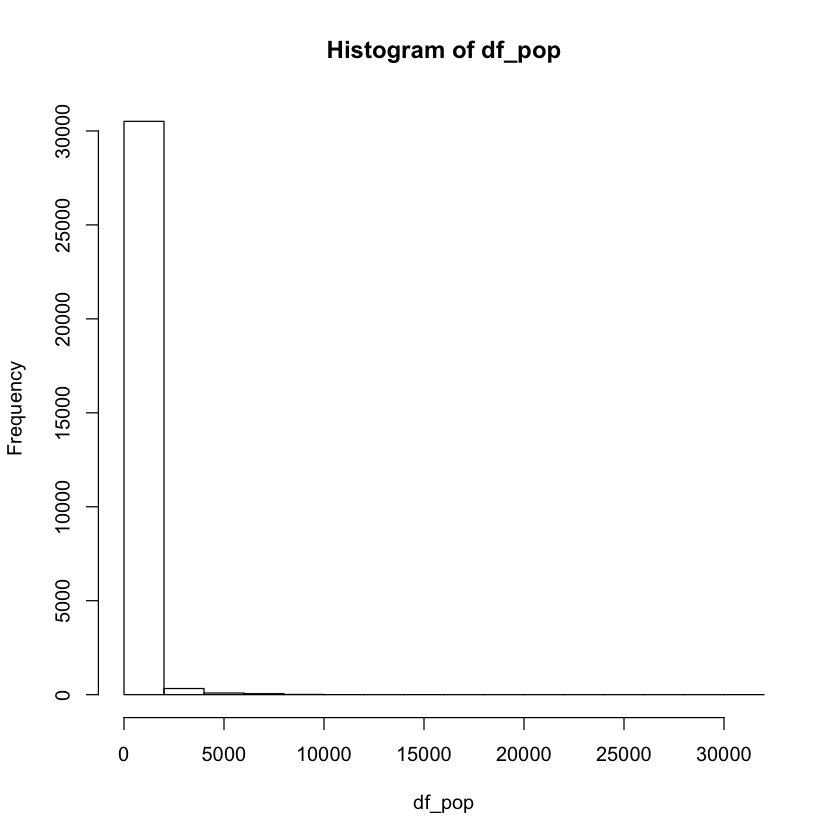

In [108]:
# Population contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 21381 of them have a null value, which represents approximatively 35% of the observations.
# The second value with the highest frequence is "1" - which appears to be an invalid value while talking about human population in the area surrounding a water pump. 
# 

summary(df$population)
hist(df$population)

test = as.data.frame(table(df$population))
test[order(-test$Freq),]
dim(test)



summary(df$population[df$population>0])
df_pop<- df$population[df$population>1]
hist(df_pop)

,Var1,Freq
1,0,20709
52,2010,2645
50,2008,2613
51,2009,2533
42,2000,2091
49,2007,1587
48,2006,1471
45,2003,1286
53,2011,1256
46,2004,1123


[1] 55  2

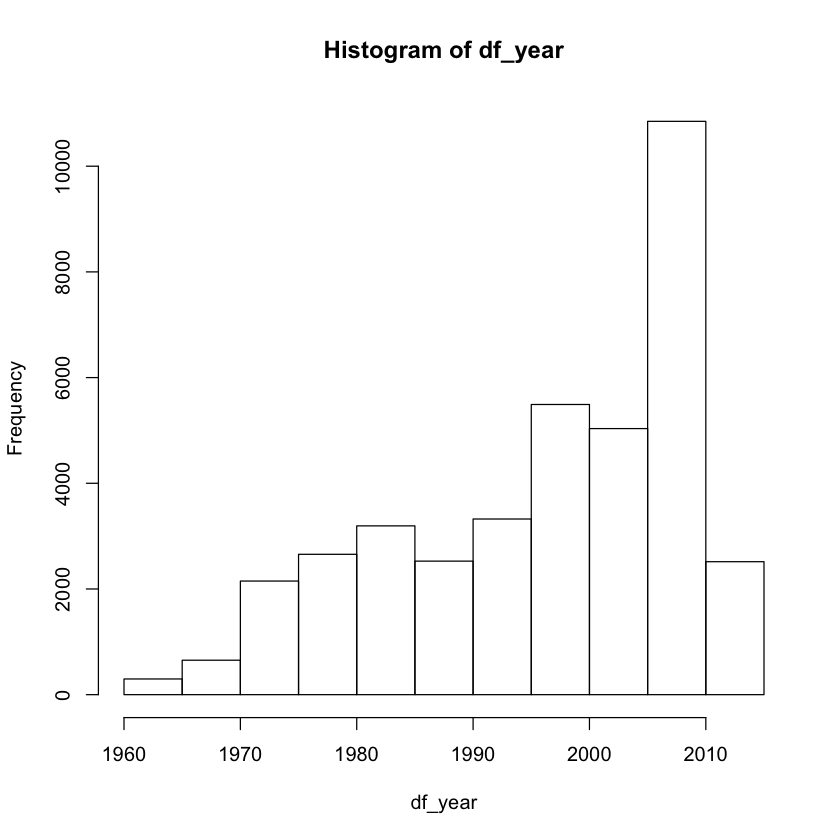

In [172]:
#Construction_years contains a significant quantity of invalid/incomplete data represented by 0.
# Out of 59,400 records, 20709 of them have a null value, which represents approximatively 35% of the observations.
# Valid values are between 1960 - 2013


test = as.data.frame(table(df$construction_year))
test[order(-test$Freq),]
dim(test)

df_year<- df$construction_year[df$construction_year > 0]
hist(df_year)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.88 loaded


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000000,-0.005320959,-0.004692261,-0.001347743,0.001718451,-0.002628714,-0.003028295,-0.003043697,-0.002812753,-0.00208209
amount_tsh,-0.005320959,1.000000000,0.076650295,0.022134163,-0.052670180,0.002943730,-0.026812995,-0.023599405,0.016287637,0.06791521
gps_height,-0.004692261,0.076650295,1.000000000,0.149155400,-0.035751368,0.007236881,-0.183520660,-0.171233044,0.135003267,0.65872697
longitude,-0.001347743,0.022134163,0.149155400,1.000000000,-0.425802163,0.023873317,0.034197013,0.151398343,0.086589705,0.39673163
latitude,0.001718451,-0.052670180,-0.035751368,-0.425802163,1.000000000,0.006836833,-0.221017948,-0.201019616,-0.022151891,-0.24527756
num_private,-0.002628714,0.002943730,0.007236881,0.023873317,0.006836833,1.000000000,-0.020376777,-0.004477512,0.003818359,0.02605563
region_code,-0.003028295,-0.026812995,-0.183520660,0.034197013,-0.221017948,-0.020376777,1.000000000,0.678602307,0.094088421,0.03172406
district_code,-0.003043697,-0.023599405,-0.171233044,0.151398343,-0.201019616,-0.004477512,0.678602307,1.000000000,0.061831423,0.04831519
population,-0.002812753,0.016287637,0.135003267,0.086589705,-0.022151891,0.003818359,0.094088421,0.061831423,1.000000000,0.26091028
construction_year,-0.002082090,0.067915211,0.658726974,0.396731626,-0.245277557,0.026055629,0.031724057,0.048315185,0.260910280,1.00000000


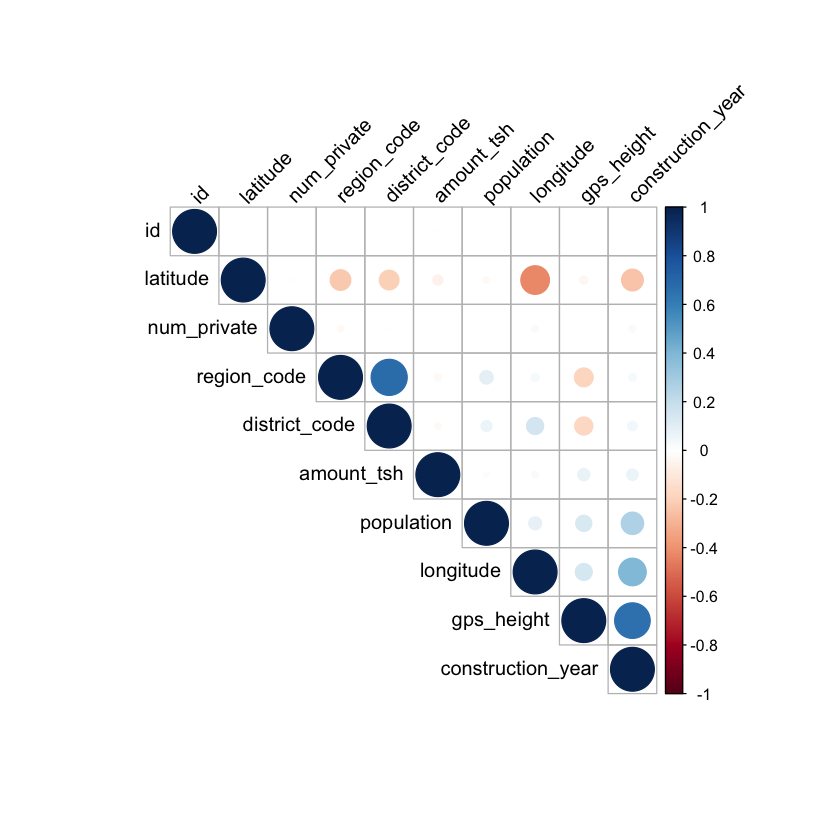

In [128]:
#install.packages('corrplot')
#library(corrplot)
mcor<-cor(df_numeric)
mcor

corrplot(mcor, type="upper", order="hclust", tl.col="black", tl.srt=45)

#### Categorical features

In [132]:
str(df[,categorical_features])

'data.frame':	59400 obs. of  30 variables:
 $ date_recorded        : chr  "14/03/2011" "06/03/2013" "25/02/2013" "28/01/2013" ...
 $ funder               : chr  "roman" "grumeti" "lottery club" "unicef" ...
 $ installer            : chr  "roman" "grumeti" "world vision" "unicef" ...
 $ wpt_name             : chr  "none" "zahanati" "kwa mahundi" "zahanati ya nanyumbu" ...
 $ basin                : chr  "lake nyasa" "lake victoria" "pangani" "ruvuma / southern coast" ...
 $ subvillage           : chr  "mnyusi b" "nyamara" "majengo" "mahakamani" ...
 $ region               : chr  "iringa" "mara" "manyara" "mtwara" ...
 $ lga                  : chr  "ludewa" "serengeti" "simanjiro" "nanyumbu" ...
 $ ward                 : chr  "mundindi" "natta" "ngorika" "nanyumbu" ...
 $ public_meeting       : logi  TRUE NA TRUE TRUE TRUE TRUE ...
 $ recorded_by          : chr  "geodata consultants ltd" "geodata consultants ltd" "geodata consultants ltd" "geodata consultants ltd" ...
 $ scheme_management

##### ID , Date_recorded & Recorded_by :

The 3 aforementionned features are used for reference purposes. Those administrative variables will not be used as predictor and will therefore be dropped of our prediction model.

##### Funder & Installer:



In [120]:

test = as.data.frame(table(df$funder))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
458,government of tanzania,9084
1,,3635
263,danida,3114
515,hesawa,2202
1418,rwssp,1374
1867,world bank,1349
729,kkkt,1287
1869,world vision,1246
1743,unicef,1057
1635,tasaf,877


[1] 1898    2

In [121]:
test = as.data.frame(table(df$installer))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
387,dwe,17405
1,,3655
513,government,1891
585,hesawa,1395
1448,rwe,1206
263,commu,1065
313,danida,1050
362,district council,961
802,kkkt,910
3,0,777


[1] 1936    2

##### Wpt_name:

The Wpt_name column contains almost 37400 different values. Given this large number of different outputs (with respect to the total number of records), one could argue that the Wpt_name variable will bring low value (if any) to our prediction model, and can therefore be dropped.


In [136]:
test = as.data.frame(table(df$wpt_name))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
32437,none,3565
35530,shuleni,1748
37196,zahanati,830
29744,msikitini,535
5143,kanisani,323
1067,bombani,271
35864,sokoni,260
33199,ofisini,254
34405,school,208
34838,shule ya msingi,199


[1] 37399     2

##### Basin:

The feature splits the data set into 9 substantial groups (with more than 2450 observations per group). In addition, this feature does not contain invalid records.

In [137]:
test = as.data.frame(table(df$basin))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
5,lake victoria,10248
6,pangani,8940
7,rufiji,7976
1,internal,7785
4,lake tanganyika,6432
9,wami / ruvu,5987
2,lake nyasa,5085
8,ruvuma / southern coast,4493
3,lake rukwa,2454


[1] 9 2

##### Subvillage:

Subvillage contains almost 19300 unique values. Given this large number of possible subvillage values, the variable will likely present very few or no value to our prediction model.


In [138]:
test = as.data.frame(table(df$subvillage))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
8770,madukani,508
17686,shuleni,506
9076,majengo,502
5187,kati,373
1,,371
12446,mtakuja,262
17846,sokoni,232
8611,m,187
12978,muungano,172
10416,mbuyuni,164


[1] 19288     2

##### Region:
VOir si pas mieux utiliser code région? On gagne 20 variables

In [139]:
test = as.data.frame(table(df$region))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
4,iringa,5294
18,shinyanga,4982
11,mbeya,4639
7,kilimanjaro,4379
12,morogoro,4006
1,arusha,3350
5,kagera,3316
14,mwanza,3102
6,kigoma,2816
17,ruvuma,2640


[1] 21  2

##### Lga, Ward:

The features Lga and Ward presents a large number of possible values with very low frequencies. The tables  hereunder shows us that for both features, the frequencies of the most occurent values do not exceed 5%. Given this, we can drop those two variables as it will give little or none value to our prediction. 

In [140]:
test = as.data.frame(table(df$lga))
test[order(-test$Freq),]
dim(test)




,Var1,Freq
92,njombe,2503
1,arusha rural,1252
74,moshi rural,1251
6,bariadi,1177
101,rungwe,1106
37,kilosa,1094
29,kasulu,1047
63,mbozi,1034
66,meru,1009
4,bagamoyo,997


[1] 125   2

In [141]:
test = as.data.frame(table(df$ward))
test[order(-test$Freq),]
dim(test)




,Var1,Freq
325,igosi,307
387,imalinyi,252
1898,siha kati,232
1184,mdandu,231
1595,nduruma,217
783,kitunda,203
1244,mishamo,203
1373,msindo,201
149,chalinze,196
1005,maji ya chai,190


[1] 2092    2

##### Public meeting:

Public meeting is a boolean variable with approximatively 85% of true values, less than 10% of false records and 5% of incomplete data. 

In [145]:
test = as.data.frame(table(df$public_meeting))
test[order(-test$Freq),]
dim(test)


,Var1,Freq
2,TRUE,51011
1,FALSE,5055


[1] 2 2

ERROR: Error in hist.default(test): 'x' must be numeric


##### Scheme_management & Scheme_name:

In [146]:
test = as.data.frame(table(df$scheme_management))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
9,vwc,36793
13,wug,5206
1,,3877
10,water authority,3153
12,wua,2883
11,water board,2748
5,parastatal,1680
6,private operator,1063
2,company,1061
4,other,766


[1] 13  2

In [148]:
test = as.data.frame(table(df$scheme_name))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
1,,28166
594,k,685
1978,none,669
163,borehole,546
221,chalinze wate,406
1106,m,400
286,danida,379
363,government,320
28,bagamoyo wate,296
1916,ngana water supplied scheme,270


[1] 2577    2

##### Permit : 
Permit is boolean variable with approximatively 65% of True values, 30% of False and 5% of unknown records.

In [150]:
test = as.data.frame(table(df$permit))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
2,TRUE,38852
1,FALSE,17492


[1] 2 2

##### Extraction_type, extraction_type_group & extraction_type_class:

By analyzing the different outputs and their relative frequencies, one can identify that the 3 features have a high degree of similarity. Indeed, the extraction_type_class categorizes the data into 7 groups, while the extraction_type and in the extraction_type_group divide the output in respectively 18 and 13 categories. 


In [151]:
test = as.data.frame(table(df$extraction_type))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
4,gravity,26780
9,nira/tanira,8154
10,other,6430
15,submersible,4764
16,swn 80,3670
8,mono,2865
5,india mark ii,2400
1,afridev,1770
7,ksb,1415
13,other - rope pump,451


[1] 18  2

In [152]:
test = as.data.frame(table(df$extraction_type_group))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
2,gravity,26780
6,nira/tanira,8154
7,other,6430
11,submersible,6179
12,swn 80,3670
5,mono,2865
3,india mark ii,2400
1,afridev,1770
10,rope pump,451
8,other handpump,364


[1] 13  2

In [153]:
test = as.data.frame(table(df$extraction_type_class))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
1,gravity,26780
2,handpump,16456
4,other,6430
6,submersible,6179
3,motorpump,2987
5,rope pump,451
7,wind-powered,117


[1] 7 2

##### Management & Management_group:

The management group feature indicates a total of 5 different possible values within the data set. The most occurent value is the "user_group" record and is associated with a frequency of almost 90%. The data set also includes 561 records with an unknown label.

In [155]:
test = as.data.frame(table(df$management_group))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
5,user-group,52490
1,commercial,3638
3,parastatal,1768
2,other,943
4,unknown,561


[1] 5 2

In [160]:
test = as.data.frame(table(df$management))
test[order(-test$Freq),]
dim(test)




,Var1,Freq
8,vwc,40507
12,wug,6515
10,water board,2933
11,wua,2535
5,private operator,1971
4,parastatal,1768
9,water authority,904
2,other,844
1,company,685
7,unknown,561


[1] 12  2

##### Payment & Payment_type:

The payment and the payment_type variables are 100% identical. It represents the payment method used by users of the water pump. Those variables classifies the different values into 7 distinct groups with the most frequent one being "never pay" and accounts for almost 45% of the data set. In addition, 15% of the records are labelled as "unknown".




In [158]:
test = as.data.frame(table(df$payment))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
1,never pay,25348
5,pay per bucket,8985
4,pay monthly,8300
7,unknown,8157
6,pay when scheme fails,3914
3,pay annually,3642
2,other,1054


[1] 7 2

In [159]:
test = as.data.frame(table(df$payment_type))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
3,never pay,25348
6,per bucket,8985
2,monthly,8300
7,unknown,8157
4,on failure,3914
1,annually,3642
5,other,1054


[1] 7 2

##### Water_quality & Quality:

"Water quality" & "Quality" contain the same values with the only difference being that in the "Water_quality" feature, a distinction is made between the following values leading to the creation of 2 extra categories;

   - *salty* - *salty abandoned*
   - *fluoride* - *fluoride abandoned*

The most frequent value is *soft* and has a frequency of almost 85%. Values with "unknown" labels accounts for less than 5% of the data set.


In [162]:
test = as.data.frame(table(df$water_quality))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
7,soft,50818
5,salty,4856
8,unknown,1876
4,milky,804
1,coloured,490
6,salty abandoned,339
2,fluoride,200
3,fluoride abandoned,17


[1] 8 2

In [164]:
test = as.data.frame(table(df$quality_group))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
3,good,50818
5,salty,5195
6,unknown,1876
4,milky,804
1,colored,490
2,fluoride,217


[1] 6 2

##### Quantity_group and Quantity:

The 2 features are 100% identical and represents the quantity of water available for each pump.
Almost 50% of the records are labelled with the value "enough". In addition, the data set contains a  small number of observations (<1,5%) with the label "unknown".


In [165]:
test = as.data.frame(table(df$quantity))
test[order(-test$Freq),]
dim(test)




,Var1,Freq
2,enough,33186
3,insufficient,15129
1,dry,6246
4,seasonal,4050
5,unknown,789


[1] 5 2

In [166]:
test = as.data.frame(table(df$quantity_group))
test[order(-test$Freq),]
dim(test)




,Var1,Freq
2,enough,33186
3,insufficient,15129
1,dry,6246
4,seasonal,4050
5,unknown,789


[1] 5 2

##### Source, Source_type and Source_class:




In [133]:
test = as.data.frame(table(df$source))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
9,spring,17021
8,shallow well,16824
4,machine dbh,11075
7,river,9612
6,rainwater harvesting,2295
2,hand dtw,874
3,lake,765
1,dam,656
5,other,212
10,unknown,66


[1] 10  2

In [134]:
test = as.data.frame(table(df$source_type))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
7,spring,17021
6,shallow well,16824
1,borehole,11949
5,river/lake,10377
4,rainwater harvesting,2295
2,dam,656
3,other,278


[1] 7 2

In [135]:
test = as.data.frame(table(df$source_class))
test[order(-test$Freq),]
dim(test)



Var1,Freq
groundwater,45794
surface,13328
unknown,278


[1] 3 2

##### Waterpoint_type_group & Waterpoint_type:

By analyzing the different outputs and their relative frequencies, one can identify that the two features are identical as they contain the same data with the sole difference that the *communal standpipe* output, which can be found in the "Waterpoint_type_group" is splitted into *communal standpipe* and *communal standpipe multiple* in the "Waterpoint_type" column.

We therefore decided to select only one of those feature and we chose the "Water_point_group" as it presents a better categorization of the data, leading to a smaller number of outputs.

In [184]:
test = as.data.frame(table(df$waterpoint_type))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
2,communal standpipe,28522
5,hand pump,17488
7,other,6380
3,communal standpipe multiple,6103
6,improved spring,784
1,cattle trough,116
4,dam,7


[1] 7 2

In [176]:
test = as.data.frame(table(df$waterpoint_type_group))
test[order(-test$Freq),]
dim(test)


,Var1,Freq
2,communal standpipe,34625
4,hand pump,17488
6,other,6380
5,improved spring,784
1,cattle trough,116
3,dam,7


[1] 6 2

[1] 0

ERROR: Error: Column `df$waterpoint_group` is unknown


After having analysed each initial feature of the dataset, we have observed that some categorical features had plenty of unique values that had a very low frequency of occurring, which we considered to simply be noise. As an example, we observed that most of the installers were only responsible for a very small number of waterpumps (between 1 and 10), which, compared to the size of the dataset (roughly 58000 entries), is simply unnecessary noise. Thus, we have sorted the unique values appearing in the installer column by their decreasing frequencies. Next, we decided to only keep the top 10 most frequent installers. We have done this for other features as well (such as etc etc etc)

### Geographical position of waterpumps

Because of how many faults we have found in the dataset, mispelled funders and installers, incomplete names etc, we could not rule out the possibility that some of the waterpumps would not actually be in Tanzania. In order to test our presumption, and act accordingly, we had to define an area represented by a square region containing Tanzania, represented by 2 points on Earth (longitude and latitude coordinates of upper right corner and lower left corner of the square), and check that each entry in the dataset actually belongs to that area. If it is the case, the corresponding entries will be kept, otherwise, they will be deleted from the dataset's corresponding dataframe. This has led to the identification and suppression of roughly 1500 entries in the dataset, which translates to 2.5% of it. 

In [7]:
#filter long/lat
x_up_right = 0.022
y_up_right = 40.729
x_down_left = -12.729
y_down_left = 28.138

df <- df[df$latitude > x_down_left & df$latitude < x_up_right & df$longitude > y_down_left & df$longitude < y_up_right, ] #filter pumps in atlantic fucking ocean

## Missing value imputation

Our dataset has missing values, as any real world dataset does. Moreover, after obtaining the number of entries in the dataset that had at least one missing value, we oberved that approximately 45% of them had missing values. Dealing with missing values and obtaining a complete dataset represents a challenge, because there is a plenty of approaches that could be taken. Some approaches include: mean/median value imputation (especially used for numerical features), random sampling value imputation (especially used for categorical features), imputation using the most frequent value present in a feature or imputation based on similarity. We have opted for the latter option, as it made the most sense to look at similar entries in the dataset and change the missing values of another entry with the values contained in the most similar entry. Additionally, in this way, we do not need to treat differently the categorical or numerical features, as it would have been the case with performing the first two approaches for missing value imputation. We argue that the third option, based on frequency, adds too much bias towards the data, which can result in worse classifying rates later. 

In [8]:
work_on = setdiff(names(df), c("id"))
df[work_on][df[work_on] == 0 | df[work_on] == "-" | df[work_on] == "" | df[work_on] == "unknown"] = NA

In [9]:
drops <- c("latitude", "longitude", "funder", "date_recorded", "gps_height", "wpt_name", "num_private", "lga", "ward", "subvillage", "region_code", "district_code", "recorded_by", "scheme_name", "waterpoint_type_group", "payment", "management", "management_group", "extraction_type_group", "extraction_type", "quantity_group", "quality_group", "amount_tsh", "population", "public_meeting", "scheme_management", "permit", "source_type", "source_class")
df = df[ , !(names(df) %in% drops)] #drop useless (a priori) features, maybe after feature selection remove less

In [20]:
### IF we keep 5 features

drops <- c("installer", "basin", "source", "payment_type")
full_df = full_df[ , !(names(full_df) %in% drops)] #drop useless (a priori) features, maybe after feature selection remove less

To successfully perform missing value imputation based on similarity, we simply take a row of the dataframe containing all the entries that have missing values and we test the similarity of its complete features to the same features of each entry that is complete in the dataset. We have used the package stringdist in order to be able to correctly treat the cases in which a distance is needed to be commputed for two words. We then take the index of the entry which has the smallest difference to the entry with missing values and insert in the original dataframe the values that needed to be completed, based on the ID of the entries.

In [10]:
similarity_test_apply = function(line) {
    NAs = is.na(line)
    idxs = which(is.na(line))
            #print(df[names(df)[idxs]])
    line2 = line[-idxs]
    most_similar = full_df[which.min(Reduce(`+`,Map(stringdist, setdiff(line2, full_df[, -idxs]), line2, method='jaccard'))),]

    line[idxs] <- most_similar[idxs] 
    to_change = which(strtoi(df$id) == strtoi(line$id))
    assign('df',df,envir=.GlobalEnv)
    df[to_change, idxs] <<- most_similar[idxs]
        
}

In [10]:
sum(complete.cases(df)) #check how many rows contain at least one NA val
full_df <- na.omit(df)
dim(full_df)

[1] 31383

[1] 31383    11

In [11]:
na_df = dplyr::setdiff(df,full_df)
dim(na_df)

[1] 26205    11

In [12]:
#testing similarity

start.time = Sys.time()
res = apply(na_df[1:nrow(na_df),], 1, similarity_test_apply)
round(Sys.time() - start.time,5)
write.csv(df, "similarity_applied.csv")

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Time difference of 4.38331 hours

In [12]:
good_df = read.csv("similarity_applied.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")
clean = c("X")
good_df = good_df[ , !(names(good_df) %in% clean)]
good_df

Warning message in file(file, "rt"):
“impossible d'ouvrir le fichier 'similarity_applied.csv' : No such file or directory”

ERROR: Error in file(file, "rt"): impossible d'ouvrir la connexion


In [16]:
df

,id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
2,8776,grumeti,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
3,34310,world vision,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
4,67743,unicef,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
5,19728,artisan,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
6,9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
7,19816,dwsp,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
8,54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
9,53934,water aid,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


## Feature engineering

### One-hot encoding

One-hot encoding is a feature enginnering method which concerns categorical features. More specifically, it refers to the process of encoding a categorical feature with $m$ unique values into $m$ features with binary encodings as values, which specify if the data belongs or not to the a certain unique value of the initial feature. One-hot encoding is generally suited for encoding categorical features whose unique values cannot be ordered in a specific manner. As a counterexample, a feature representing the size of a T-shirt has 4 unique values: S, M, L, XL. These values can be directly encoded by distributing a number from 0 to 3 to each size, in the order given above, because a certain order exists between these unique values. 

In the dataset we use, however, this is not the case. Certain features, such as the installer of the waterpump, contain unique values that cannot be ordered in a specific manner. If we were to encode those unique values into integers, that would automatically imply a sort of order between the values, which is not a good practice. It is just not possible to order the different installers of waterpumps in a certain way. Thus, for all the categorical features we have decided to apply the one-hot encoding scheme. This implicitly results in a higher dimensionality of the feature space. 



In [21]:
df_labels <- read.csv("training_labels.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")

In [27]:
good_df = df

In [29]:
indx <- tail(names(sort(table(df$installer))),10)
print(indx)
to_change = which(!(good_df$installer %in% indx))
good_df[to_change, 'installer'] = 'other'
good_df

 [1] "central government" "kkkt"               "district council"  
 [4] "danida"             "commu"              "rwe"               
 [7] "hesawa"             "government"         "roman"             
[10] "dwe"               


,id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
2,8776,other,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
3,34310,other,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
4,67743,other,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
5,19728,other,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
6,9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
7,19816,other,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
8,54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
9,53934,other,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


In [3]:
"(indx <- tail(names(sort(table(full_df$extraction_type_class))),17)
print(indx)
to_change = which(!(full_df$extraction_type %in% indx))
full_df[to_change, 'extraction_type'] = 'other'
full_df)"

[1] "(indx <- tail(names(sort(table(full_df$extraction_type_class))),17)\nprint(indx)\nto_change = which(!(full_df$extraction_type %in% indx))\nfull_df[to_change, 'extraction_type'] = 'other'\nfull_df)"

In [27]:
Merged_df = full_df

In [28]:
Merged_df<-merge(Merged_df,df_labels,by="id",all=FALSE)
dim(Merged_df)
Merged_df = Merged_df[,2:ncol(Merged_df)]
dim(Merged_df)

[1] 31383     8

[1] 31383     7

In [29]:
Merged_df = dummy.data.frame(Merged_df, sep="_")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [23]:
dim(Merged_df)
Merged_df[,70:80]

[1] 31383    80

source_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional needs repair,status_group_non functional
0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0
0,0,0,1,0,0,0,0,1,0,0
0,0,0,1,0,0,0,0,0,1,0
0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,1,0,0


## Feature selection

In [ ]:
#df.pca <- prcomp(dftest_, center = TRUE,scale. = TRUE)
#summary(df.pca)

# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


## Model 1 : Random Forest

In [24]:
#Target var not one hot encod - problem :( 3 one hot encod target features created - only one taken into consideration)
library("randomForest")

n_trees <- 20
accuracy_vec <- array(0,n_trees)

df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variable <-ncol(Merged_df)


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]
    
model_rf <- randomForest(x=train_data[,-c(target_variable)],
                         y=as.factor(train_data[,c(target_variable)]),
                         xtest=test_data[,-c(target_variable)],
                         ytest=as.factor(test_data[,c(target_variable)]),
                         ntree=n_trees, do.trace=T)
    

accuracy_vec[0] = (model_rf$test$confusion[1,1]+model_rf$test$confusion[2,2])/sum(model_rf$test$confusion)

#plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate") 

ntree      OOB      1      2|    Test      1      2
    1:   3.15%  1.74%  5.85%|   3.20%  1.51%  6.32%
    2:   3.04%  2.22%  4.61%|   3.00%  1.34%  6.07%
    3:   3.88%  2.42%  6.70%|   1.40%  0.73%  2.65%
    4:   4.20%  2.61%  7.28%|   1.50%  0.61%  3.16%
    5:   4.55%  2.54%  8.51%|   0.84%  0.49%  1.49%
    6:   4.26%  2.44%  7.84%|   1.22%  0.61%  2.36%
    7:   4.16%  2.24%  7.91%|   0.99%  0.59%  1.74%
    8:   3.76%  1.89%  7.43%|   1.20%  0.37%  2.72%
    9:   3.17%  1.55%  6.35%|   0.61%  0.33%  1.13%
   10:   2.61%  1.35%  5.09%|   0.61%  0.24%  1.31%
   11:   2.34%  1.14%  4.70%|   0.40%  0.22%  0.73%
   12:   1.92%  0.95%  3.82%|   0.25%  0.10%  0.54%
   13:   1.69%  0.77%  3.50%|   0.27%  0.12%  0.54%
   14:   1.54%  0.63%  3.33%|   0.23%  0.08%  0.51%
   15:   1.23%  0.52%  2.62%|   0.19%  0.08%  0.40%
   16:   1.07%  0.49%  2.22%|   0.18%  0.04%  0.44%
   17:   1.03%  0.44%  2.18%|   0.17%  0.06%  0.36%
   18:   0.91%  0.43%  1.87%|   0.14%  0.04%  0.33%
   19:   0.8

In [25]:
y_pred_rf = predict(model_rf, newdata = test_data[,-target_variable])

ERROR: Error in predict.randomForest(model_rf, newdata = test_data[, -target_variable]): No forest component in the object


In [26]:
print((model_rf$test$confusion[1,1]+model_rf$test$confusion[2,2])/sum(model_rf$test$confusion))

[1] 0.9985976


## Model 2 : Neural Network

In [27]:
library(nnet)

df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variable <-ncol(Merged_df)


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]

hidden_nodes<-72
threshold<-0.5
target_variable <-c(ncol(Merged_df)-2,ncol(Merged_df)-1,ncol(Merged_df))

model_nn<-nnet(x=train_data[,-target_variable],
               y=train_data[,target_variable],
               size=hidden_nodes,
               softmax=T,
               skip=FALSE,
               trace=T, 
               maxit=1000,
               MaxNWts=100000,
               rang=0.5)

model_nn

Y_pred<-predict(model_nn,test_data[,-target_variable])




#Y_hat_one_hot <- ifelse(Y_pred[,2] > threshold,"functional","functional needs repair")

head(Y_pred)

# weights:  5835
initial  value 42805.787271 
iter  10 value 20332.990796
iter  10 value 20332.990793
iter  10 value 20332.990793
final  value 20332.990793 
converged


a 77-72-3 network with 5835 weights
options were - softmax modelling 

,status_group_functional,status_group_functional needs repair,status_group_non functional
2636,0.5875005,0.06891277,0.3435867
17165,0.5875005,0.06891277,0.3435867
20360,0.5875005,0.06891277,0.3435867
27280,0.5875005,0.06891277,0.3435867
4994,0.5875005,0.06891277,0.3435867
13457,0.5875005,0.06891277,0.3435867


In [28]:
y_hat_idx = cbind(1:nrow(Y_pred), max.col(Y_pred, 'first'))

In [29]:
Y <- test_data[,target_variable]
y_idx = cbind(1:nrow(Y), max.col(Y, 'first'))

In [30]:
good_preds = which(y_hat_idx[,2] == y_idx[,2])
n_good = length(good_preds)
print(n_good/nrow(Y))

[1] 0.6036197


## Model 3 :  Support Vector Machine

In [133]:
#install.packages("e1071")
library(e1071)

names(Merged_df)[(length(names(Merged_df))-1)]<-"status_group_functional_needs_repair"
names(Merged_df)[length(names(Merged_df))]<-"status_group_non_functional"
Merged_df

df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/2)

#Merged_df

    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]

train_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
train_funct_rep = train_data[,-which(names(train_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
train_non_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

test_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
test_funct_rep = test_data[,-which(names(test_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
test_non_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

#DS<-cbind(train_funct,functional = train_funct[,ncol(train_funct)])

# Model fit (using lm function)
model_svm_f<- svm(status_group_functional~.,train_funct, probability=TRUE)

# Model prediction 
Y_hat_f<- predict(model_svm_f,test_funct, probability=TRUE)

#DS<-cbind(train_funct_rep,funct_rep = train_funct_rep[,ncol(train_funct_rep)])

# Model fit (using lm function)
model_svm_fr<- svm(status_group_functional_needs_repair~.,train_funct_rep,probability=TRUE)

# Model prediction 
Y_hat_fr<- predict(model_svm_fr,test_funct_rep,probability=TRUE)

#DS<-cbind(train_non_funct,non_functional = train_non_funct[,ncol(train_non_funct)])

# Model fit (using lm function)
model_svm_nf<- svm(status_group_non_functional~.,train_non_funct,probability=TRUE)

# Model prediction 
Y_hat_nf<- predict(model_svm_nf,test_non_funct,probability=TRUE)



,region_arusha,region_iringa,region_kigoma,region_kilimanjaro,region_lindi,region_manyara,region_mara,region_morogoro,region_mtwara,region_mwanza,...,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional_needs_repair,status_group_non_functional
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [134]:
Y_hat_fr = data.frame(Y_hat_fr)
Y_hat_nf = data.frame(Y_hat_nf)
Y_hat_f = data.frame(Y_hat_f)
predictions = cbind(Y_hat_f, Y_hat_fr, Y_hat_nf)
predictions

,Y_hat_f,Y_hat_fr,Y_hat_nf
,<dbl>,<dbl>,<dbl>
2402,0.86920435,0.025002690,0.15226842
3073,0.04802844,0.953328138,0.04712184
18813,0.95071125,0.025161582,0.04722639
6434,0.90832576,0.025144738,0.04735435
6327,0.95442068,0.024968544,0.04498301
20572,0.01996273,0.015296122,0.98032890
30994,0.03239396,0.025165586,0.95242882
16625,0.94889237,0.025183205,0.04731846
21508,0.93720234,0.025157662,0.04430976


In [135]:
y_hat_idx_svm = cbind(1:nrow(predictions), max.col(predictions, 'first'))

In [136]:
Y = test_data[,(ncol(test_data)-2):ncol(test_data)]
y_idx_svm = cbind(1:nrow(Y), max.col(Y, 'first'))

In [98]:
train_funct

,region_arusha,region_iringa,region_kigoma,region_kilimanjaro,region_lindi,region_manyara,region_mara,region_morogoro,region_mtwara,region_mwanza,...,quantity_insufficient,quantity_seasonal,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5947,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
20097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19987,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7245,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3123,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
9120,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
26480,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23372,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3115,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [137]:
good_preds = which(y_hat_idx_svm[,2] == y_idx_svm[,2])
n_good = length(good_preds)
print(n_good/nrow(Y))

[1] 0.7435636


In [45]:
dim(Merged_df)
sum(complete.cases(Merged_df))

[1] 57588    85

[1] 57588

In [ ]:
###CV test
library(e1071)
CV_folds <- 3
N = nrow(Merged_df)

size_CV <-floor(N/CV_folds)

CV_err<-numeric(CV_folds)

names(Merged_df)[(length(names(Merged_df))-1)]<-"status_group_functional_needs_repair"
names(Merged_df)[length(names(Merged_df))]<-"status_group_non_functional"

for (i in 1:CV_folds) {
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    test_data<-Merged_df[idx_ts,]  
    
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    
    train_data <- Merged_df[idx_tr,]
     
    train_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
    train_funct_rep = train_data[,-which(names(train_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
    train_non_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

    test_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
    test_funct_rep = test_data[,-which(names(test_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
    test_non_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

    #DS<-cbind(train_funct,functional = train_funct[,ncol(train_funct)])

    # Model fit (using lm function)
    model_svm_f<- svm(status_group_functional~.,train_funct, probability=TRUE)

    # Model prediction 
    Y_hat_f<- predict(model_svm_f,test_funct, probability=TRUE)

    #DS<-cbind(train_funct_rep,funct_rep = train_funct_rep[,ncol(train_funct_rep)])

    # Model fit (using lm function)
    model_svm_fr<- svm(status_group_functional_needs_repair~.,train_funct_rep,probability=TRUE)

    # Model prediction 
    Y_hat_fr<- predict(model_svm_fr,test_funct_rep,probability=TRUE)

    #DS<-cbind(train_non_funct,non_functional = train_non_funct[,ncol(train_non_funct)])

    # Model fit (using lm function)
    model_svm_nf<- svm(status_group_non_functional~.,train_non_funct,probability=TRUE)

    # Model prediction 
    Y_hat_nf<- predict(model_svm_nf,test_non_funct,probability=TRUE)
     
    
    
    Y_hat_fr = data.frame(Y_hat_fr)
    Y_hat_nf = data.frame(Y_hat_nf)
    Y_hat_f = data.frame(Y_hat_f)
    predictions = cbind(Y_hat_f, Y_hat_fr, Y_hat_nf)
    # Cross validation error = Mean Squared Error
    
    y_hat_idx_svm = cbind(1:nrow(predictions), max.col(predictions, 'first'))
    Y = test_data[,(ncol(test_data)-2):ncol(test_data)]
    y_idx_svm = cbind(1:nrow(Y), max.col(Y, 'first'))
    
    good_preds = which(y_hat_idx_svm[,2] == y_idx_svm[,2])
    n_good = length(good_preds)
    accuracy = n_good/nrow(Y)
    
    print(i)
    print(accuracy)
    
    #cross entropy left to compute
}

# Alternative models





In [18]:
library(keras)

Warning message:
"package 'keras' was built under R version 4.0.5"


In [19]:
good_df

id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
8776,grumeti,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,world vision,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
67743,unicef,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,artisan,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
19816,dwsp,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
53934,water aid,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


In [30]:
Merged_df<-merge(good_df,df_labels,by="id",all=FALSE)
dim(Merged_df)



[1] 57588    12

In [31]:
Merged_df = Merged_df[,2:ncol(Merged_df)] #drop id when training, not a feature

In [32]:
Merged_df = dummy.data.frame(Merged_df, sep="_")
dim(Merged_df)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

[1] 57588    85

In [33]:
Merged_df

,installer_central government,installer_commu,installer_danida,installer_district council,installer_dwe,installer_government,installer_hesawa,installer_kkkt,installer_other,installer_roman,...,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional needs repair,status_group_non functional
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
library(tensorflow)

physical_devices = tf$config$list_physical_devices('GPU')
tf$config$experimental$set_memory_growth(physical_devices[[1]],TRUE)
tf$keras$backend$set_floatx('float32')

ERROR: Error in physical_devices[[1]]: subscript out of bounds


In [40]:
install_tensorflow(version='gpu')

ERROR: Error: could not find a Python environment for C:/Users/guzga/AppData/Local/Programs/Python/Python39/python.exe


In [41]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 120, activation = 'relu', input_shape = c(82)) %>% 
  #layer_dropout(rate = 0.1) %>% 
  layer_dense(units = 140, activation = 'relu') %>%
  layer_dense(units = 150, activation = 'relu') %>%
  layer_dense(units = 90, activation = 'relu') %>%
  layer_dense(units = 80, activation = 'relu') %>%
  layer_dense(units = 75, activation = 'relu') %>%
  layer_dense(units = 40, activation = 'relu') %>%
  layer_dense(units = 20, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'relu') %>%
  #layer_dropout(rate = 0.1) %>%
  layer_dense(units = 3, activation = 'softmax')

In [42]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

In [ ]:
df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variables <-c((ncol(Merged_df)-2),(ncol(Merged_df)-1), ncol(Merged_df))


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

In [ ]:
x_train = train_data[,-target_variables]
y_train = train_data[,target_variables]


x_train = array_reshape(x_train, c(nrow(x_train), 83))
y_train = array_reshape(y_train, c(nrow(y_train), 3))
x_train = x_train[,2:ncol(x_train)]
x_train = data.matrix(x_train)
y_train = data.matrix(y_train)
dim(x_train)

In [ ]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 200, batch_size = 64,
  validation_split = 0.2
)

In [ ]:
plot(history)

# Conclusions